# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Analyzing Errors
Analyzing the notebooks that ran into various errors while the script was executing (`github2017-twelfth-errors.csv`)

## Loading the .csv file

In [5]:
errors_filepath = 'github2017-twelfth-errors.csv'
errors_df = pd.read_csv(errors_filepath)

# initial look at the data
errors_df.head()

,nb_id,repo_id,err_in
0,1002342,29721163,api
1,1004322,72808162,api
2,1010017,89438537,no_code
3,1012797,72123088,api
4,1013068,72123088,api


## Plotting the error data

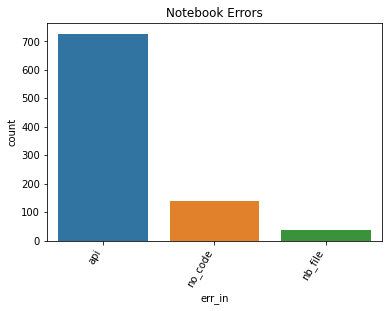

In [6]:
# create a bar plot of the errors column
error_plot = sns.countplot(x = 'err_in', data = errors_df)

# fix the appearance of the bar plot
temp = error_plot.set_xticklabels(error_plot.get_xticklabels(), rotation = 60, ha = 'right')
temp = error_plot.set(title = 'Notebook Errors')

These numbers are similar to those of previous runs.

# Analyzing Adjusted Features

Analyzing the data obtained from running improved feature scripts on the dataset (`github2017-twelfth-run.csv`) and comparing those results with previous runs of those feature scripts (`github2017-tenth-run.csv`)

## Loading the .csv files

In [8]:
results_filepath = 'github2017-twelfth-run.csv'
results_df = pd.read_csv(results_filepath)

# initial look at the data
results_df.head()

,nb_id,repo_id,has_param,num_stars
0,1000546,70752864,False,1
1,1000590,92964180,False,0
2,1000623,90007255,False,0
3,1001147,80488185,False,0
4,1001280,24748843,False,0


In [9]:
old_results_filepath = '../tenth-run/github2017-tenth-run.csv'
old_results_df = pd.read_csv(old_results_filepath)

# initial look at the data
old_results_df.head()

,nb_id,repo_id,has_export,num_functions,has_test,num_headers,has_papermill,has_reqtext
0,900493,85972539,True,0,False,0,False,False
1,322852,45655960,False,0,False,2,False,False
2,457759,27685708,False,0,False,1,False,False
3,672138,92749043,True,2,False,2,False,False
4,103154,30734070,True,0,False,0,False,False


The features that were adjusted and whose data will be compared against the tenth run are:

- `has_param`: named `has_papermill` in the previous run, now checks for `parameterization` import and manual parameterization (assignments of constants)

## Plotting, Cleaning, and Comparing the Data

In [10]:
def clean_column(field, df):
    
    # isolate the right columns
    original = df[['nb_id', 'repo_id', field]]
    
    # filter out the NaN rows
    clean = original.dropna(subset = [field])
    
    # return the cleaned column
    return clean

### Parameterization

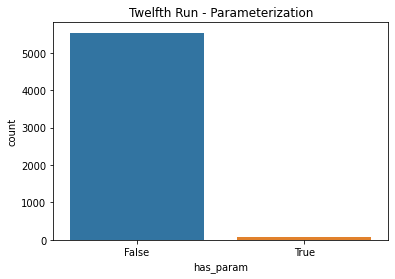

In [11]:
# clean the data
has_param = clean_column('has_param', results_df)

# plot the data
has_param_plot = sns.countplot(x = 'has_param', data = has_param)

# fix appearance
temp = has_param_plot.set(title = 'Twelfth Run - Parameterization')

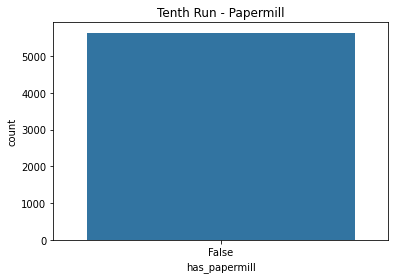

In [12]:
# repeat the same for old results
has_papermill = clean_column('has_papermill', old_results_df)
has_papermill_plot = sns.countplot(x = 'has_papermill', data = has_papermill)
temp = has_papermill_plot.set(title = 'Tenth Run - Papermill')

We see that modifying the script resulted in a higher hit rate, as it detected more notebooks have having manually parameterized

# Analyzing New Features

Analyzing the data obtained from running the new feature scripts on the dataset (`github2017-twelfth-run.csv`)

## Loading the .csv file

The .csv file was already loaded in the previous section, so we simply take an initial look at the data again

In [13]:
results_df.head()

,nb_id,repo_id,has_param,num_stars
0,1000546,70752864,False,1
1,1000590,92964180,False,0
2,1000623,90007255,False,0
3,1001147,80488185,False,0
4,1001280,24748843,False,0


The new features for this run are:

- `num_stars`: the number of stars for the repository

## Plotting and Cleaning the Data

### Stars

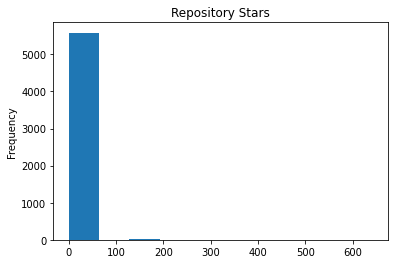

In [14]:
# clean the data
num_stars = clean_column('num_stars', results_df)

# plot the data
num_stars_plot = num_stars['num_stars'].plot(kind = 'hist')

# set title
temp = num_stars_plot.set_title('Repository Stars')